# 1.0 Introduction

### Customer Churn in E-commerce Industry

Customer churn, also known as customer attrition or turnover, is a critical concern in the e-commerce industry. It refers to the phenomenon where customers cease their relationship with a particular e-commerce platform or brand. Understanding and managing customer churn is essential for sustaining a successful e-commerce businessFollowingre are a few key points about customer churn in the e-commerce industry:

1. **Causes of Churn:** Various factors contribute to customer churn in e-commerce, including poor user experience, unsatisfactory product quality, lack of personalized services, pricing issues, and competition from other platforms. Identifying the specific reasons for churn is crucial for implementing effective retention strategies.

2. **Impact on Revenue:** Customer churn directly affects the revenue of e-commerce businesses. Losing existing customers means not only a decline in current sales but also a potential reduction in future revenue streams. It is often more cost-effective to retain existing customers than to acquire new tomers.

4. **Personalization and Customer Engagement:** Offering personalized experiences and targeted promotions can enhance customer loyalty. E-commerce platforms that invest in understanding customer preferences and provide tailored recommendations tend to create stronger bonds with their customers, reducing the likelihood of churn.

5. **Communication and Feedback:** Regular communication with customers is essential to address concerns and gather feedback. Surveys, reviews, and customer support channels play a vital role in understanding customer sentiment. Proactive communication about new features, promotions, or improvements can help maintain engagement.

6. **Loyalty Programs:** Implementing loyalty programs and incentives can encourage customers to stay with a particular e-commerce platform. Rewarding repeat purchases, providing exclusive discounts, or offering membership benefits can enhance customer loyalty and reduce churn.

7. **Responsive Customer Support:** A responsive and effective customer support system is crucial for retaining customers. Resolving issues promptly, providing clear communication, and ensuring a positive customer service experience can significantly impact customer satisfaction and loyalty.

In summary, managing customer churn is a strategic imperative for e-commerce businesses. By employing data-driven insights, personalization strategies, and effective communication, e-commerce platforms can mitigate churn, retain customers, and foster long-term success in a highly c
Hence, an E-commerce businesses leverage data analytics and machine learning algorithms to predict customer churn. Analyzing user behavior, purchase history, and engagement patterns helps in identifying customers at risk of churning. Predictive analytics enables proactive measures to retain these customers.mpetitive market.


# 2.0 Aim and Objectives

1. **Primary Objective:** Uncovering the pivotal factors influencing customer attrition in the realm of E-commerce is our primary goal.

2. **Algorithm Evaluation:** Evaluating performance metrics, our aim is tdevelopnt the most effective algorithF for accurately predicting customer churn.

3. **Retention Strategies:** Drawing insights from the analysis, our goal is to formulate effective customer retention strategies.


# 3.0 Dependencies Import

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from joblib import dump, load

pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

# 4.0 Data Acquisition and description

In [ ]:
data_og = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [ ]:
df = data_og.copy() #working on a copy of data so as to have an Untouched Data if required ahead

## 4.1 Data Description

| Variable                  | Description                                            |
|---------------------------|--------------------------------------------------------|
| CustomerID                | Unique customer ID                                     |
| Churn                     | Churn Flag                                             |
| Tenure                    | Tenure of customer in organization                      |
| PreferredLoginDevice      | Preferred login device of customer                      |
| CityTier                  | City tier                                              |
| WarehouseToHome           | Distance in between warehouse to home of customer       |
| PreferredPaymentMode      | Preferred payment method of customer                    |
| Gender                    | Gender of customer                                     |
| HourSpendOnApp            | Number of hours spent on mobile application or website  |
| NumberOfDeviceRegistered  | Total number of devices registered for a particular customer |
| PreferedOrderCat          | Preferred order category of customer in the last month   |
| SatisfactionScore         | Satisfactory score of customer on service                |
| MaritalStatus             | Marital status of customer                              |
| NumberOfAddress           | Total number of addresses added for a particular customer |
| Complain                  | Any complaint raised in the last month                   |
| OrderAmountHikeFromlastYear| Percentage increase in order amount from last year      |
| CouponUsed                | Total number of coupons used in the last month           |
| OrderCount                | Total number of orders placed in the last month          |
| DaySinceLastOrder         | Days since the last order by the customer                |
| CashbackAmount            | Average cashback in the last month                      |


- Churn Variable is the dependent variable and model will predict the same based on other inputs

In [ ]:
df.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Observations**
- We have total of 20 features out of which first column is CustomerID which does not provide any valuable information and hence, will be dropped. Also, Churn feature is dependent variable leaving us with 18 independent features
- There are total 5630 data points
- Few columns like Tenure, WarehouseToHome, HourSpendOnApp, etc have null values which will be handled in Data Pre-processing stage
- The data-type for all the columns seems appropriate for their description

In [ ]:
df.drop('CustomerID', axis=1, inplace=True)

# 5.0 Data Pre-processing

## 5.1 Outliers

### 5.1.1 Outliers detection

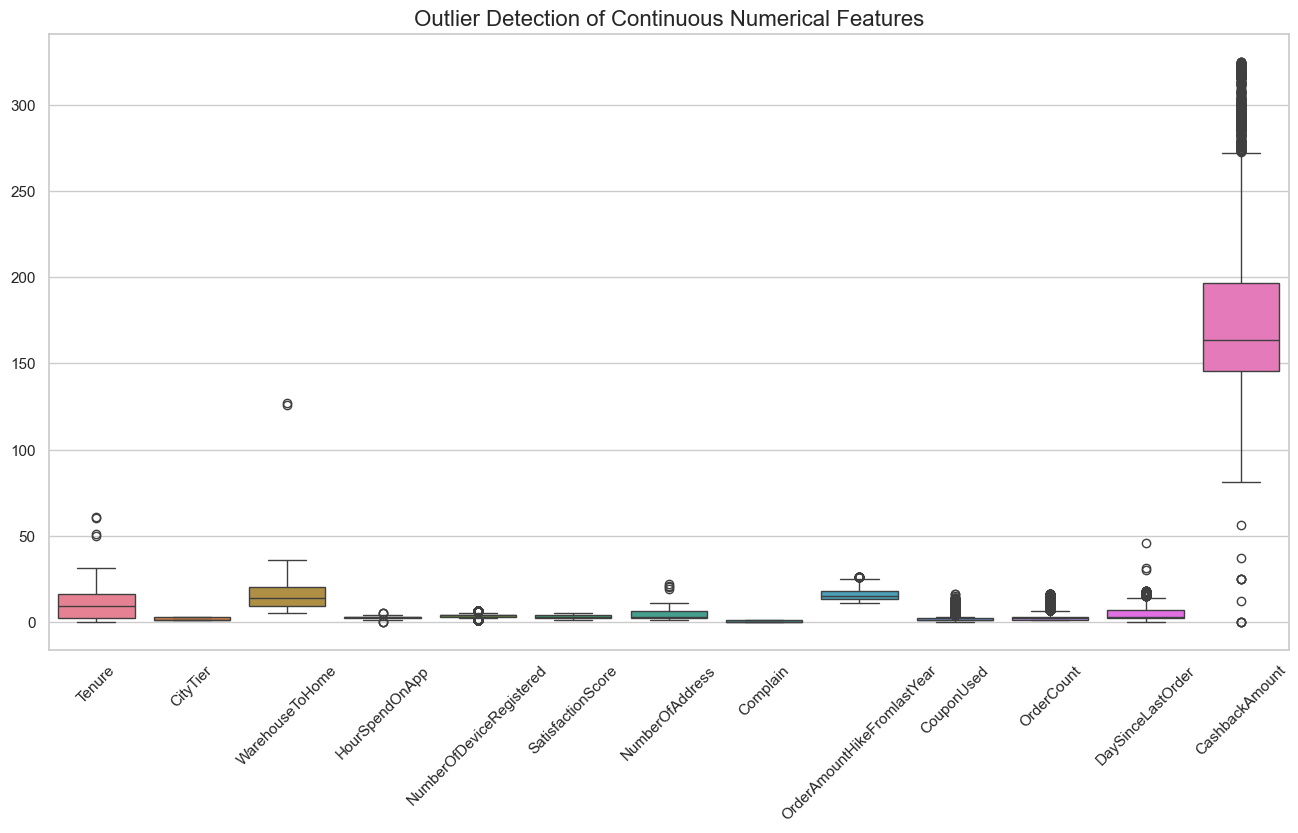

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the figure
plt.figure(figsize=(16, 8))

# Create a boxplot for all columns
sns.boxplot(data=df.iloc[:,1:])
plt.title('Outlier Detection of Continuous Numerical Features', size = 16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the boxplot
plt.show()

### 5.1.2 Outlier Handling

- Numerous features exhibit outliers.
- Employing a quantile-based flooring approach, outliers are identified as values beyond 1.5 times the interquartile range (IQR).
- To address these outliers, values exceeding this threshold are replaced with the respective quantile values, specifically Q1 minus 1.5 times the IQR and Q3 plus 1.5 times the IQR.




In [ ]:
cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('Churn')
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3-Q1
    lower_thresh = Q1-(1.5 * IQR)
    upper_thresh = Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols] < lower_thresh, lower_thresh )
    df[cols] = df[cols].mask(df[cols] > upper_thresh, upper_thresh )

- Boxplot post outliers removal

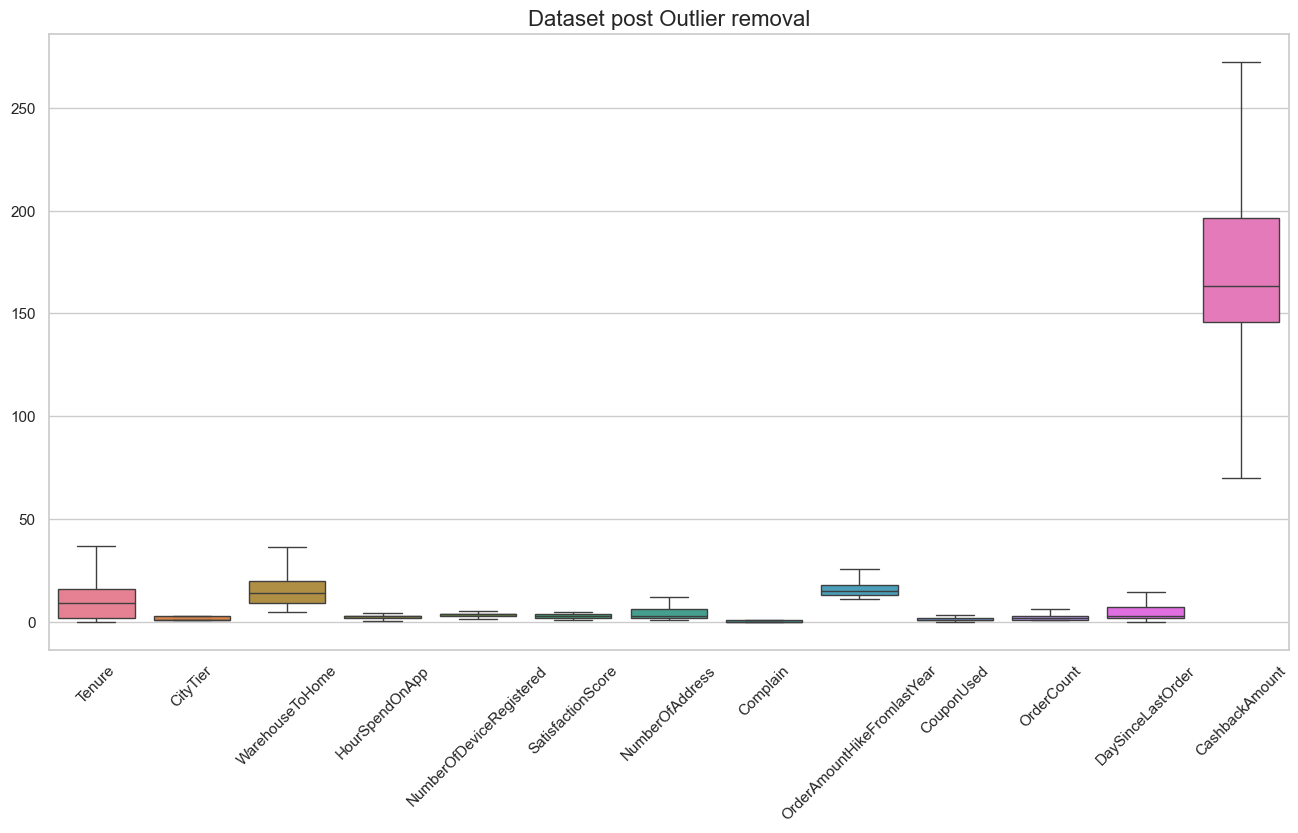

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the figure
plt.figure(figsize=(16, 8))

# Create a boxplot for all columns
sns.boxplot(data=df.iloc[:,1:])
plt.title('Dataset post Outlier removal', size = 16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show the boxplot
plt.show()

- Data looks free from outliers

## 5.2 Missing Values

### 5.2.1 Missing Value detection

In [ ]:
# Use a color palette
palette = sns.color_palette("bright")
sns.set_palette(palette)

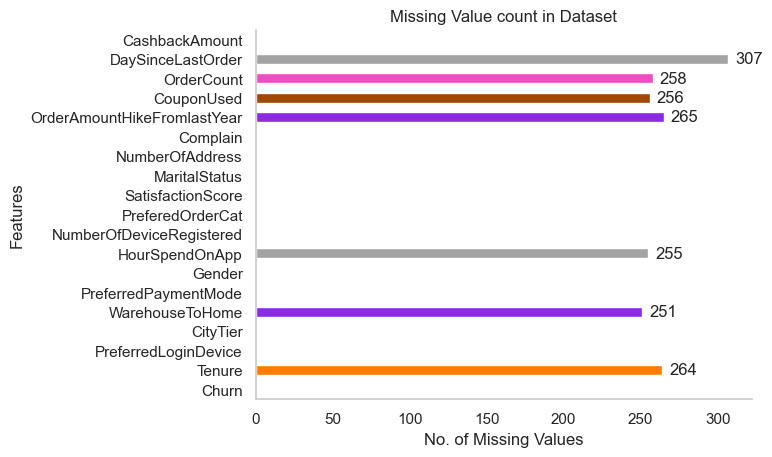

In [ ]:
ax = df.isna().sum().plot(kind = 'barh',  color=palette);
ax.grid(False)

# Display the actual values at the end of each bar
for p in ax.patches:
    if p.get_width() > 0:
        ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Adding labels and title
plt.xlabel('No. of Missing Values')
plt.ylabel('Features')
plt.title('Missing Value count in Dataset')

#setting the top & right figure boundary as invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

**Observations:**
- There are 7 columns having null values.
- It is possible that while data collection zero value were captured as blanks and hence, resulting in null values in df. Unique value check will provide the required information and accordingly missing value shall be imputed

In [ ]:
null_col_names = df.isna().sum()[df.isna().sum() != 0].keys().to_list()

In [ ]:
for col in null_col_names:
    print(f"Below is Unique values in {col} column")
    print(f"{df[col].unique()}\n")

Below is Unique values in Tenure column
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 37. 31.]

Below is Unique values in WarehouseToHome column
[ 6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
 26.  14.   nan 10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
 34.   5.  21.  36.5  7.  36. ]

Below is Unique values in HourSpendOnApp column
[3.  2.  nan 1.  0.5 4.  4.5]

Below is Unique values in OrderAmountHikeFromlastYear column
[11.  15.  14.  23.  22.  16.  12.   nan 13.  17.  18.  24.  19.  20.
 21.  25.  25.5]

Below is Unique values in CouponUsed column
[1.  0.  3.5 2.  nan 3. ]

Below is Unique values in OrderCount column
[ 1.  6.  2.  4.  3. nan  5.]

Below is Unique values in DaySinceLastOrder column
[ 5.   0.   3.   7.   2.   1.   8.   6.   4.  14.5  9.  11.  10.   nan
 13.  12.  14. ]



In [ ]:
impute_null_val_col = []
for col in null_col_names:
    uniq_val = df[col].unique()
    if 0 in uniq_val:
        impute_null_val_col.append(col)

print(f"Zero value is present in features {impute_null_val_col} and hence, null values represent missing value which needs to be imputed")

Zero value is present in features ['Tenure', 'CouponUsed', 'DaySinceLastOrder'] and hence, null values represent missing value which needs to be imputed


- Analyzing columns having **NO Zero** value that could probably mean **Null values as Zero**

In [ ]:
impute_not_reqd_col = list(set(null_col_names) - set(impute_null_val_col))

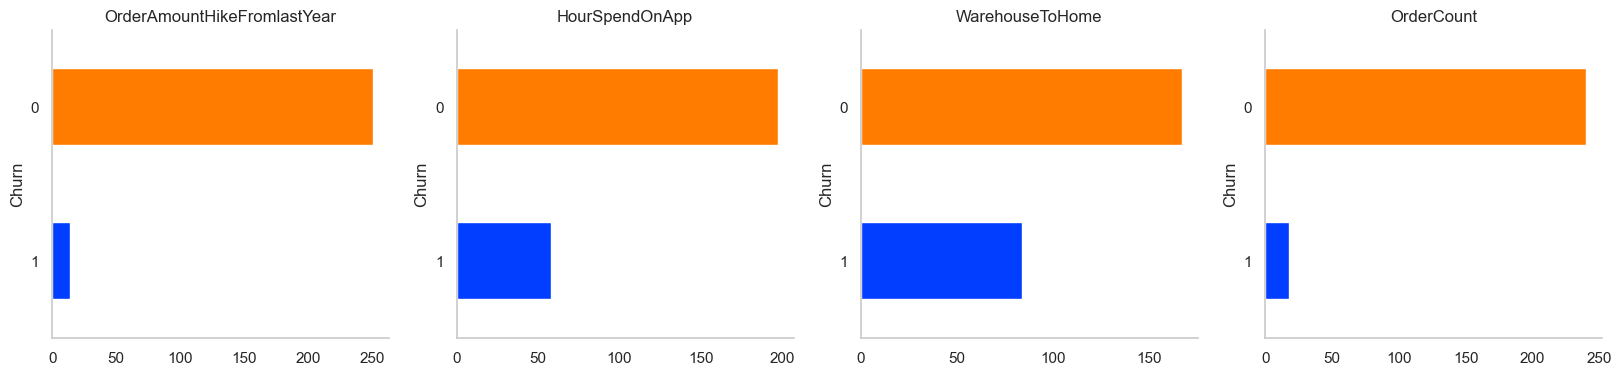

In [ ]:
plt.figure(figsize=(20, 4))
i = 0
for col in impute_not_reqd_col:
    plt.subplot(1, 4, i+1)
    ax = df[df[col].isna()][['Churn', col]]['Churn'].value_counts().sort_values().plot(kind = 'barh', color=palette);
    ax.grid(False)
    plt.title(col)
    #setting the top & right figure boundary as invisible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    i += 1

- As can be seen from above chart, NULL values here **DO NOT** represent **Zero** as cases when any of the above features have **Zero** value, customer have mostly stayed in the business

### 5.2.2 Missing value impution

- Replacing the null values with Median values

In [ ]:
# median values (50%) of columns having null values before filling it
df[null_col_names].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,5366.000000,5379.000000,5375.000000,5365.000000,5374.000000,5372.000000,5323.000000
mean,10.176109,15.606432,2.931535,15.704846,1.461388,2.545607,4.511554
std,8.497799,8.268992,0.720184,3.667070,1.092096,1.747825,3.519328
min,0.000000,5.000000,0.500000,11.000000,0.000000,1.000000,0.000000
25%,2.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.000000
50%,9.000000,14.000000,3.000000,15.000000,1.000000,2.000000,3.000000
75%,16.000000,20.000000,3.000000,18.000000,2.000000,3.000000,7.000000
max,37.000000,36.500000,4.500000,25.500000,3.500000,6.000000,14.500000


In [ ]:
df[null_col_names] = df[null_col_names].fillna(df[null_col_names].median())

In [ ]:
df[null_col_names].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,10.120959,15.534813,2.934636,15.671670,1.440409,2.520604,4.429130
std,8.299859,8.089328,0.703826,3.582823,1.071295,1.711109,3.439184
min,0.000000,5.000000,0.500000,11.000000,0.000000,1.000000,0.000000
25%,3.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.000000
50%,9.000000,14.000000,3.000000,15.000000,1.000000,2.000000,3.000000
75%,15.000000,20.000000,3.000000,18.000000,2.000000,3.000000,7.000000
max,37.000000,36.500000,4.500000,25.500000,3.500000,6.000000,14.500000


- Median values have remained the same indicating null values getting filled with correct median value

In [ ]:
df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## 5.3 Categorical Features

- Finding Unique values from each features to locate any discrepancy

In [ ]:
for col in cat:
    print(f"Below is Unique values in {col} column")
    print(f"{df[col].unique()}\n")

Below is Unique values in PreferredLoginDevice column
['Mobile Phone' 'Phone' 'Computer']

Below is Unique values in PreferredPaymentMode column
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Below is Unique values in Gender column
['Female' 'Male']

Below is Unique values in PreferedOrderCat column
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Below is Unique values in MaritalStatus column
['Single' 'Divorced' 'Married']



**Observations:**
- Mobile Phone and Phone are one and the same for feature column **PreferredLoginDevice**. Replacing Phone with Mobile Phone
- COD and Cash on Delivery are one and the same for feature column **PreferredPaymentMode**. Replacing Cash on Delivery with COD
- CC and Credit Card are one and the same for feature column **PreferredPaymentMode**. Replacing CC with Credit Card
- Mobile and Mobile Phone are same for feature column **PreferedOrderCat**. Replacing Mobile phone with Mobile

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile').replace('Mobile Phone', 'Mobile')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('Cash on Delivery', 'COD').replace('CC', 'Credit Card')
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')

# 6.0 Exploratory Data Analysis - EDA

## 6.1 Univariate Analysis

### 6.1.1 Target Variable Distribution

Text(0.5, 1.0, 'Distribution in Target Variable')

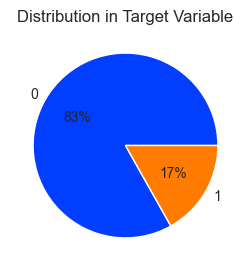

In [ ]:
plt.figure(figsize=(3,3))
ax = df['Churn'].value_counts().plot(kind = 'pie', autopct='%.0f%%', textprops={'fontsize': 10})
ax.set_ylabel('')
ax.set_title('Distribution in Target Variable', fontdict={'fontsize': 12})

- The distribution shows that the dataset is an **UnBalanced** one

### 6.1.2 Categorical Features

In [ ]:
cat = df.select_dtypes(include='object').columns
cat

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

#### Distribution across Categorical features based on Customer Churn

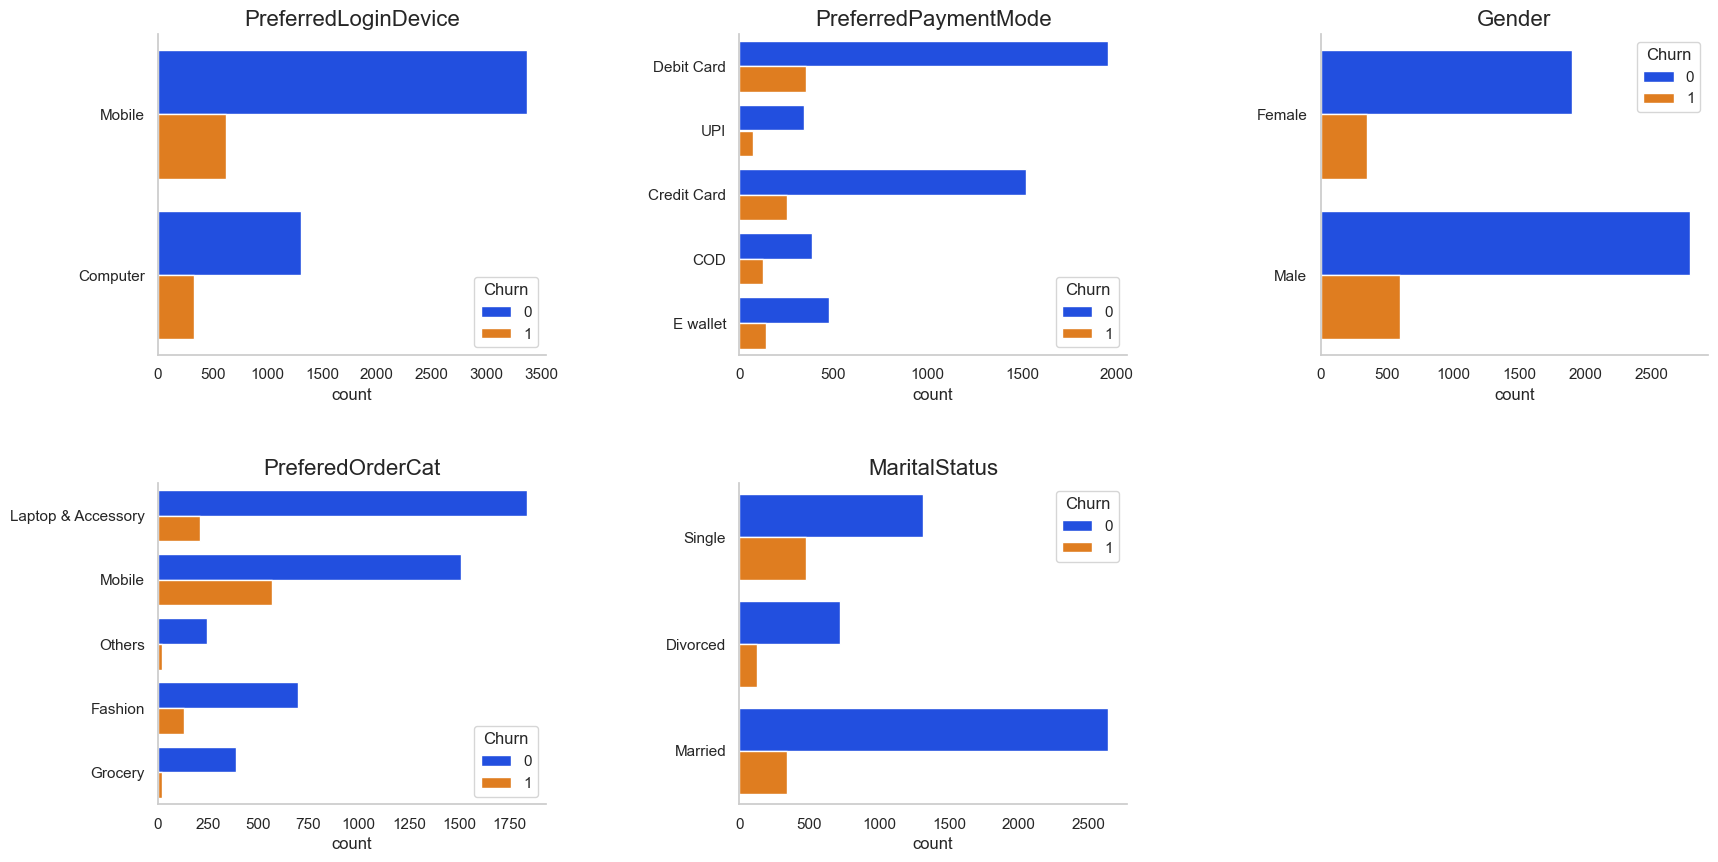

In [ ]:
plt.figure(figsize=(20, 10))
i = 0

for col in cat:
    plt.subplot(2, 3, i+1)

    plt.subplots_adjust(hspace=0.4, wspace=0.5)
    ax = sns.countplot(y = df[col], hue=df.Churn)

    ax.grid(False)
    ax.set_ylabel('')

    ax.set_title(col, fontdict={'fontsize': 16})

    #setting the top & right figure boundary as invisible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    i += 1

**Observations:**
- Mobile is preferred login device
- Card (Debit/Credit) transactions are preferred payment method
- Males shop more than females
- Electronic items like Laptop and Mobile are most preferred order category
- Married people shop more but have very low churn percentage

#### Distribution across categorical features for Customers already churned

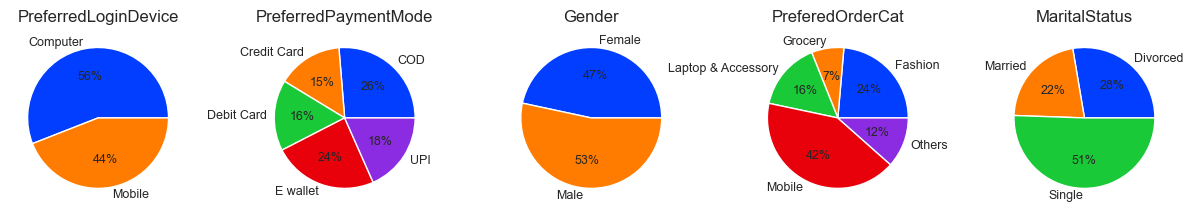

In [ ]:
plt.figure(figsize=(15, 7))
i = 0

for col in cat:
    plt.subplot(1, 5, i+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)

    grpby_df = df.groupby(col)['Churn'].sum()
    total = df.value_counts(col).sort_index()
    percent_contrib_res = grpby_df/total*100

    ax = percent_contrib_res.plot(kind = 'pie', labels = percent_contrib_res.index, x = percent_contrib_res.values, autopct='%.0f%%',textprops={'fontsize': 9})

    ax.grid(False)
    ax.set_ylabel('')
    # plt.title(col)
    ax.set_title(col, fontdict={'fontsize': 12})
    i += 1

**Observations:**
- The distribution for **Preferred_login_device, Payment_mode and Gender are almost equal** indicating those may not be best candidates in deciding whether a customer would churn
- Out of all the customers who have churned, **42%** of them have **Preferred_order_category** as **Mobiles**
- **Single consumers** churn **more** compared to Married ones

### 6.1.3 Numerical Features

#### Distribution across Numerical features based on Customer Churn

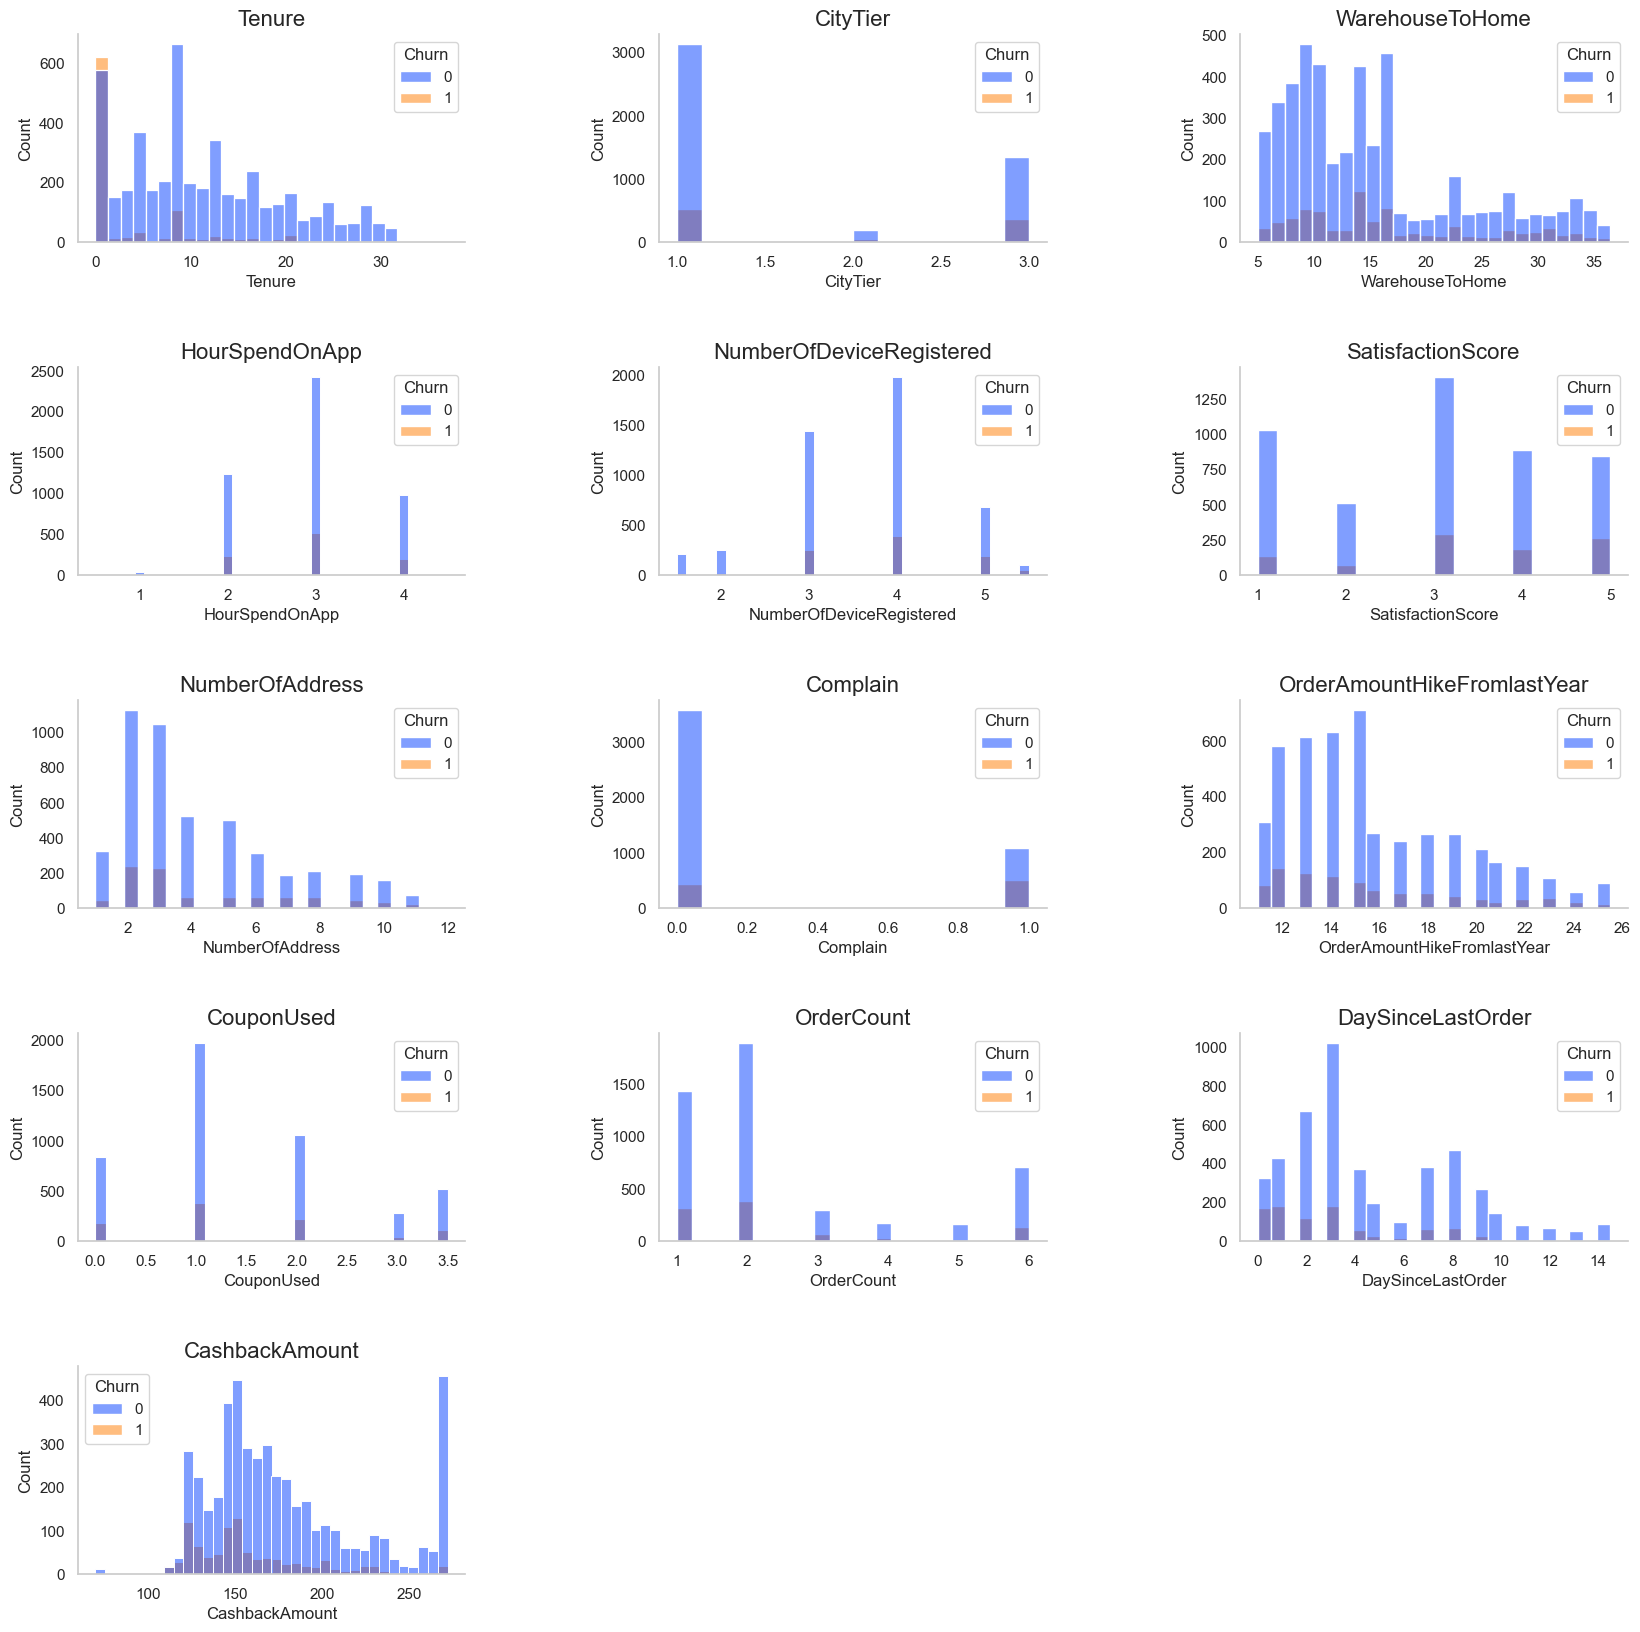

In [ ]:
plt.figure(figsize=(20, 20))
i = 0

for col in num:
    plt.subplot(5, 3, i+1)

    plt.subplots_adjust(hspace=0.6, wspace=0.5)
    ax = sns.histplot(data=df, x = col, hue='Churn')

    ax.grid(False)
    # ax.set_ylabel('')

    ax.set_title(col, fontdict={'fontsize': 16})

    #setting the top & right figure boundary as invisible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    i += 1

In [ ]:
df['Complain'].value_counts(), df['Complain'].value_counts()[1]/5603

(Complain
 0    4026
 1    1604
 Name: count, dtype: int64,
 0.28627520970908443)

In [ ]:
df[df['DaySinceLastOrder'] < 5].shape, df[df['DaySinceLastOrder'] < 5].shape[0]/5603

((3540, 19), 0.6318043905050865)

**Observations:**
- Most of the customers have **tenure between 2-20**
- Major portion of customers are from **Tier 1** city
- Customers who are **near to warehouse (between 5-16) leading to lower delivery times** are in significantly higher numbers
- Most of the customers **spend 2-3 hours on company app or website**
- Most of the customers have **satisfaction score between 3-5**
- Arnd **1600 customers (28%) have lodged complaints** in the last month
- **Percentage increase in order** from previous year mostly ranges **between 5-16%**
- **3000+ customers** have placed order in the **last 5 days**

#### Distribution across numerical features for Customers already churned

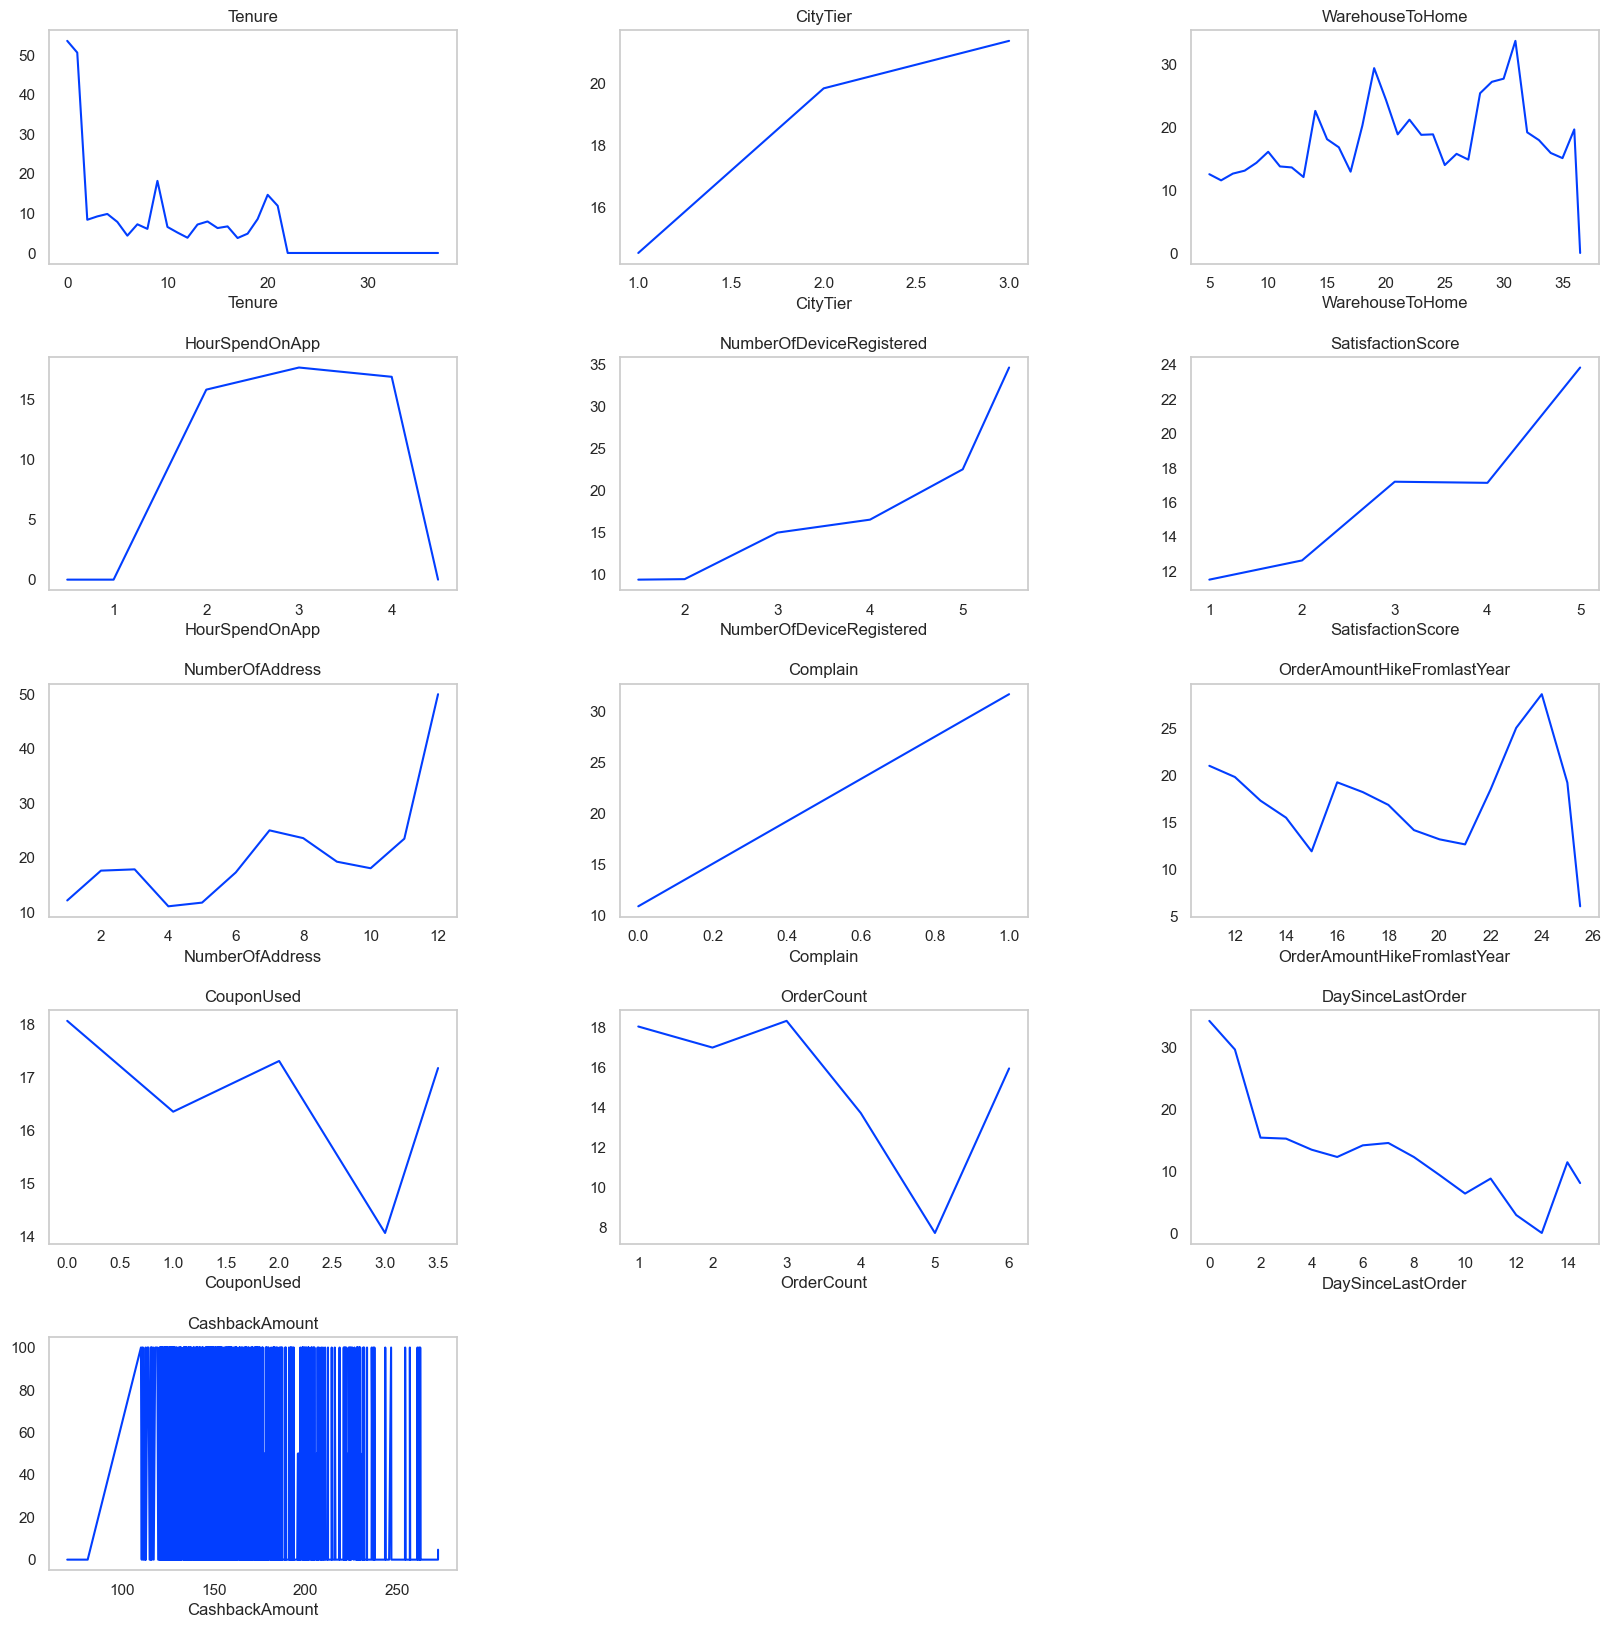

In [ ]:
plt.figure(figsize=(20, 20))
i = 0

for col in num:
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    grpby_df = df.groupby(col)['Churn'].sum()
    total = df.value_counts(col).sort_index()
    percent_contrib_res = grpby_df/total*100

    ax = percent_contrib_res.plot(kind = 'line', x = percent_contrib_res.index, y= percent_contrib_res.values)

    ax.grid(False)
    ax.set_ylabel('')
    # plt.title(col)
    ax.set_title(col, fontdict={'fontsize': 12})
    i += 1

**Observations:**
- **New customers tend to leave early**. Focussed plan to be made specifically for new customers for retention.
- Churn rate is higher among **Tier 3** cities compared to **Tier 1**
- Consumers **closer to warehouse** have high churn rate
- Consumers having **4 devices registered** leave the business more
- Even though **Statisfaction Score is 5** customers leave the business which could mean the consumers now have different needs which might not be currently available on the platform
- Higher the **number of complaints** higher is the churn %
- Lower **increase in % number of orders from previous year** indicate customers might leave the business
- Most **Customer used 1-2 number** of coupons in the last month indicating higher coupon usage
- Continued trend of Lower **order count** in previous month could indicate customer losing interest
- Customers who have **ordered in recent 3-4 days** leave higher compared to others. Probably they could be one time users, customer-focus offers, coupons, etc might turn them into frequent customers
- Customers who get **cashback amount** in range of **120-160** leave most compared to others

## 6.2 Multivariate Analysis

In [ ]:
corr_numerical_col = num.copy()
corr_numerical_col.insert(0,'Churn')

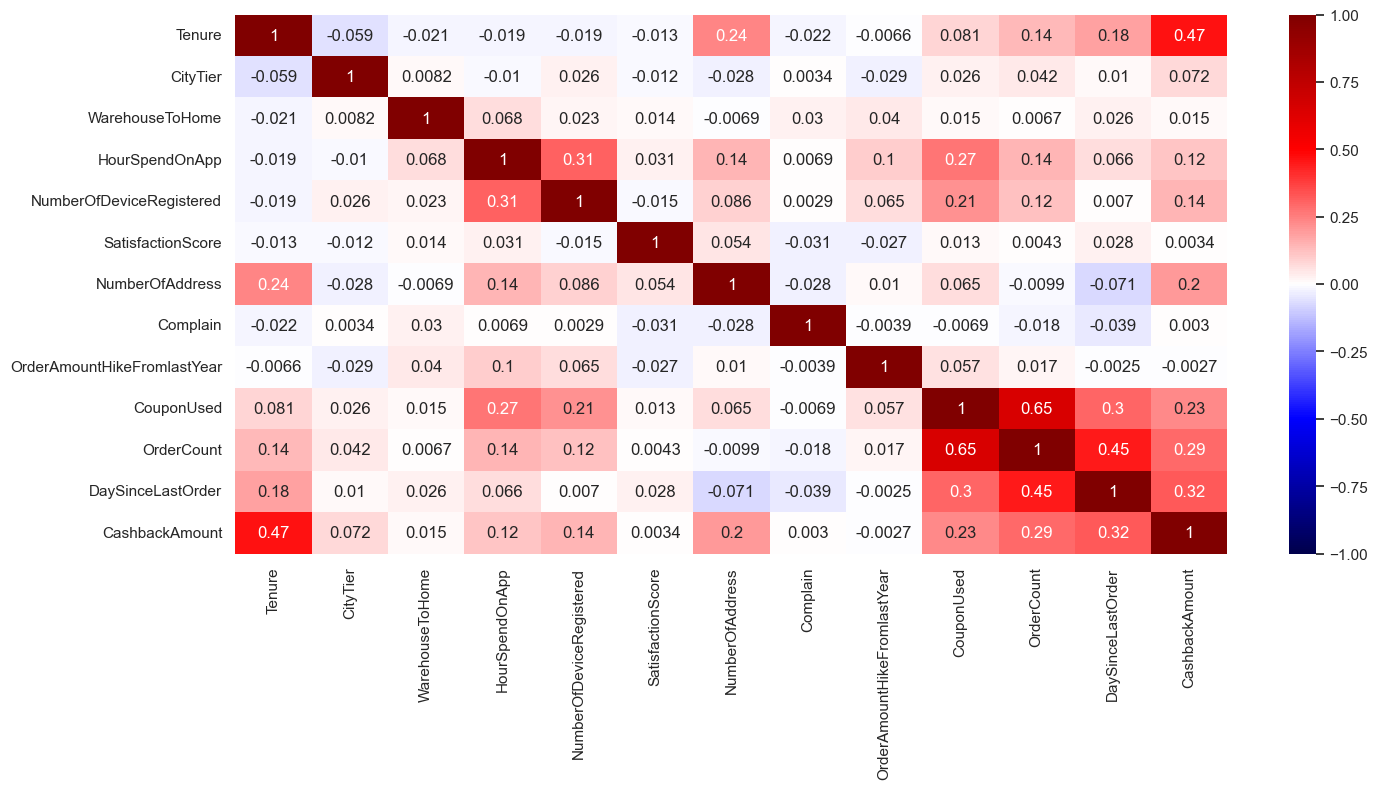

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(df[num].corr(method='pearson'), cmap='seismic', vmin=-1, vmax=1, annot=True);

**Observations:**
- We notice a positive correlation between tenure and the cashback amount.
- Additionally, both coupon usage and order count exhibit a strong positive correlation.
- While tenure and complaints show some impact on churn, the remaining variables appear to be relatively neutral.

# 7.0 Model Building

## 7.1 Model Evaluation Criteria

- As can be seen from above plot, it is an imbalanced dataset. Thus, only **accuracy** is not the metric to be considered while evaluating model performance.
- Now ***0*** indicate scustomere staying and ***1*** indicate scustomee leaving
- Our target is to prepare a model which will reduce chance of People who are actually going to leave (1) to be predicted as they are going stay (0).
- In other words we need to lower our **False Negatives**
- Recall is calculated as **TP/(TP+ FN)**
- If **Recall** value is higher it means, we will have low **False Negatives** and thereby, we will be able to correctly identify customers who are going to leave and take appropriate action accordingly

## 7.2 Dataset Preparation

#### Dependencies Import

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest

from sklearn.base import BaseEstimator, ClassifierMixin



#### Split Data into Train and Test

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(df.drop('Churn', axis=1), df.Churn)

#### Pipeline Creation

In [ ]:
categorical_columns = cat
standard_scaled_columns = num

# Define transformers
ohe = OneHotEncoder(sparse=False)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, cat),
        ('scaler', StandardScaler(), num)
    ],
    remainder='passthrough'
)

In [ ]:
class my_classifier(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', my_classifier())
])

#### GridSearchCV for Model Parameter Tunining

In [ ]:
# Define parameter space for GridSearchCV
parameters = [
              {'clf':[LogisticRegression(max_iter=1000)],
               'clf__C':[0.001,0.01,0.1,1],
               'clf__solver':['lbfgs','liblinear'],
               'clf__random_state' : [42],
               'clf__n_jobs' : [-1]
               },
             {'clf':[RandomForestClassifier(n_estimators=200)],
             'clf__criterion':['entropy', 'gini'],
             'clf__random_state' : [42],
             'clf__n_jobs' : [-1]
             },
             {
              'clf':[XGBClassifier(n_estimators=200)],
             'clf__learning_rate':[0.01,0.1,1],
             'clf__reg_lambda':[0.01,0.1,1],
             'clf__reg_alpha': [0.01,0.1,1],
             }]

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Tenure',
                                                                          'CityTier',
                                                                          'WarehouseToHome',
                                                                          'HourSpendOnApp',
                                                                          '...
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=200, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                          'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__reg_alpha': [0.01, 0.1, 1],
                          'clf__reg_lambda': [0.01, 0.1, 1]}])

#### Saving best model as a Pickle file for Inference

In [ ]:
estimator = grid_search.best_estimator_
dump(estimator, "customer_churn_best_model.joblib")

['customer_churn_best_model.joblib']

## 7.4 Model Evaluation

#### Loading the saved Model File

In [ ]:
estimator = load("customer_churn_best_model.joblib")

#### Prediction on Test Data

In [ ]:
y_pred = estimator.predict(X_test)

#### Confusion Matrix

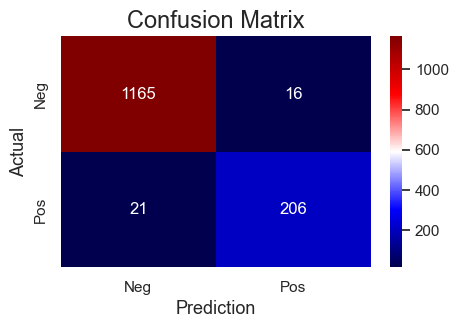

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g', cmap='seismic',
            xticklabels=['Neg','Pos'],
            yticklabels=['Neg','Pos'])

plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
accuracy, precision, recall

(0.9737215909090909, 0.9279279279279279, 0.9074889867841409)

**Conclusion:**
- The best Model developed has **Recall score of 91%** which means model will catch 91% of the customers who will actually churn.
- Out of the customers it predicted as will churn, **93% of them will actually churn**
- Overall all **accuracy is 97%**

## 7.5 Model Explainability

In [ ]:
feature_array = grid_search.best_estimator_[-1].feature_importances_
importance = dict(zip(df.drop('Churn',axis=1).columns,feature_array))
importance = dict(sorted(importance.items(), key= lambda item:item[1],reverse = True))

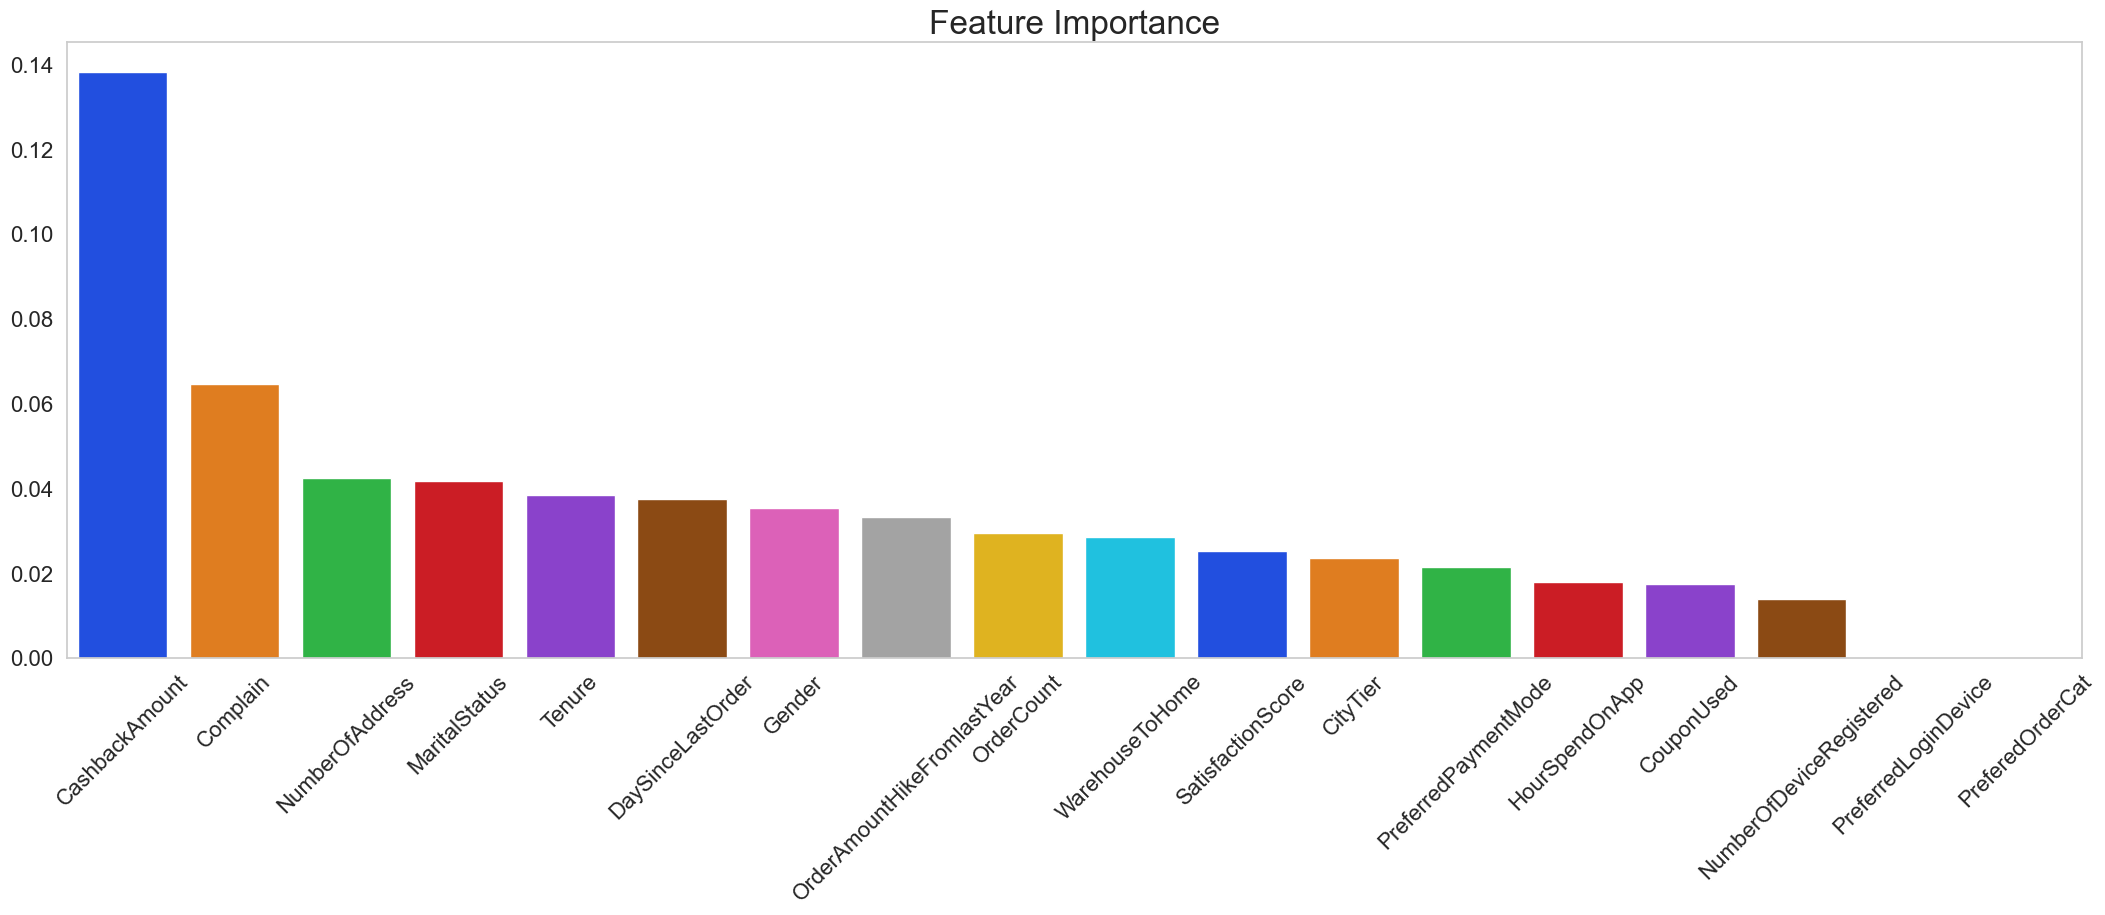

In [ ]:
fig, ax = plt.subplots(figsize=(26,8))

sns.barplot(x=list(importance.keys()), y=list(importance.values()), palette=palette)
plt.tick_params(axis='x', labelrotation=45)

ax.xaxis.set_tick_params(labelsize = 16)
ax.yaxis.set_tick_params(labelsize = 16)
ax.grid(False)

plt.title('Feature Importance',fontsize=24)
plt.show()

**Observations:**
- **Cashback Amount and Marital Status** mostly predicts whether a customer would churn or not
- Apart from these two features, **other features contribute almost the same** for predicting customer churn

# 8.0 Inference

### Python Script for deploying

In [ ]:
import pandas as pd
from joblib import load

def get_prediction(filename, model):

    #load data
    infer_df = pd.read_excel(filename)
    print(f"The given data is \n{infer_df}")

    #Processing before Prediction
    infer_df['PreferredLoginDevice'] = infer_df['PreferredLoginDevice'].replace('Phone', 'Mobile').replace('Mobile Phone', 'Mobile')
    infer_df['PreferredPaymentMode'] = infer_df['PreferredPaymentMode'].replace('Cash on Delivery', 'COD').replace('CC', 'Credit Card')
    infer_df['PreferedOrderCat'] = infer_df['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')

    #load the model
    estimator = load(model)

    #predict based on the loaded model
    prediction = estimator.predict(infer_df)[0]

    #Provide Result
    result = 'Customer will CHURN' if prediction == 1 else 'Customer will STAY'
    return result

if __name__=='__main__':
    filename = 'Inference_data.xlsx'
    model = "customer_churn_best_model.joblib"
    result = get_prediction(filename, model)
    print(f"Result is \"{result}\"")


The given data is 
   Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       4         Mobile Phone         3                6   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female               3                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                           11           1           1   

   DaySinceLastOrder  CashbackAmount  
0                  5          159.93  
Result is "Customer will STAY"


### StreamLit Deployment

**Refer Below Link where the solution is deployed on StreamLit cloud**
- [Google](https://www.google.com)

# 8.0 Conclusion

**Recommendations:**
- Provide discounts, cashbacks, etc on Electronic items like Mobile, Laptop for customer retention and generation
- Build recommendation systems targeted towards Male married people and their requirements
-	Conduct market research to understand needs of Tier 2 & 3 cities and recommend products accordingly
-	Customer grievances to be closely monitored and resolved. Root cause analysis to be carried out for high number of complaints in last month
-	Coupons provided to the customer should be for items customer normally browse leading to higher usage


**Model Characteristics:**
- The model developed has **97% accuracy and 91% recall** score.
- Features that mostly define customer churn are **Cashback Amount and Marital Status**